## To identify which rate is the most effective in reducing mortality

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Janice\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Janice\anaconda3\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
C:\Users\Janice\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## MSEIRS Equations
Reference: 
- https://www.freecodecamp.org/news/how-to-model-an-epidemic-with-r/ 

In our MSEIRS system, we make the below assumptions:
1. The death rate and born rate are the same, which means the number of population will not change over time.
2. Both passive maternally-derived immunity and temporary immunity weakened at the same rate

In [2]:
# define the MSEIRS function
def MSEIRS_model(time, current_state, beta, sigma, gamma, delta, lam):
    M, S, E, I, R, D = current_state
    
    N = M + S + E + I + R + D
    # -weakend rate * infant with immunity + new born rate * new born with immunity prob
    dM = -delta * M + lam * I * R / N
    # - contact rate * contact probabilities 
    # + new born losing passive immunity rate 
    # + new born rate * new born without immunity prob
    dS = -(beta * S * I) / N + delta * M + lam * I * (1 - R / N) + delta * R
    dE = (beta * S * I) / N - sigma * E
    # infectious rate - recovery rate - death rate
    dI = sigma * E - gamma * I - lam * I
    # recovery rate + immunity weakened rate
    dR = gamma * I - delta * R
    # death
    dD = lam * I 
    
    return [dM, dS, dE, dI, dR, dD]

## Initial Parameters
beta = 0.5 : Transmission/Contact rate  
sigma = 0.25 : Infectious rate  
gamma = 0.2 : Recovery rate  
delta = 0.1 : Immunity weakened rate  
lambda = 0.05 : Birth/Death rate 
days = 365 : Number of days to simulate

Note: Please comment/uncomment and re-run all the codes to use the related parameters.

In [3]:
# control

delta = 0.1
beta = 0.5
sigma = 0.25
gamma = 0.2
lam = 0.05

In [4]:
# decrease each rate by 0.05

# reduce rate of M->S, delta
# delta = 0.05
# beta = 0.5
# sigma = 0.25
# gamma = 0.2
# lam = 0.05

# reduce transmission rate, beta
# delta = 0.1
# beta = 0.45
# sigma = 0.25
# gamma = 0.2
# lam = 0.05

# reduce infectious rate, sigma
# delta = 0.1
# beta = 0.5
# sigma = 0.2
# gamma = 0.2
# lam = 0.05

# reduce recovery rate, gamma
# delta = 0.1
# beta = 0.5
# sigma = 0.25
# gamma = 0.15
# lam = 0.05

In [5]:
# increase each rate by 0.05

# control
# delta = 0.1
# beta = 0.5
# sigma = 0.25
# gamma = 0.2
# lam = 0.05

# incr. delta
# delta = 0.15
# beta = 0.5
# sigma = 0.25
# gamma = 0.2
# lam = 0.05

# incr. beta
# delta = 0.1
# beta = 0.55
# sigma = 0.25
# gamma = 0.2
# lam = 0.05

# incr. sigma
# delta = 0.1
# beta = 0.5
# sigma = 0.30
# gamma = 0.2
# lam = 0.05

# incr. gamma
# delta = 0.1
# beta = 0.5
# sigma = 0.25
# gamma = 0.25
# lam = 0.05

## M - Maternal Immunity, S - Susceptible, E - Exposed, I - Infectious, R - Recovered, D - Death
M = 0: The initial number of new born with maternal immunity is set to 0.  
S = 999999: The initial number of susceptible individuals is set to 999,999.  
E = 1: The initial number of exposed individuals is set to 1.  
I = 0: The initial number of infectious individuals is set to 0.  
R = 0: The initial number of recovered individuals is set to 0.  
D = 0: The initial number of death is set to 0.  

In [6]:
times = np.arange(0, 366)

# initialise the initialise state of MSEIRD
initial_state = [0, 999999, 1, 0, 0, 0]

## solve_ivp
To solve equation with respect to time

In [7]:
from scipy.integrate import solve_ivp

In [8]:
# Solve the MSEIRS model using solve_ivp
solution = solve_ivp(lambda t, y: MSEIRS_model(t, y, beta, sigma, gamma, delta, lam), [times[0], times[-1]], initial_state, t_eval=times)

## Summary of model's statistics

In [9]:
# Access the solution arrays
M = solution.y[0]
S = solution.y[1]
E = solution.y[2]
I = solution.y[3]
R = solution.y[4]
D = solution.y[5]

# Calculate summary statistics
summary_M = np.mean(M), np.min(R), np.max(R), np.percentile(R, [25, 50, 75])
summary_S = np.mean(S), np.min(S), np.max(S), np.percentile(S, [25, 50, 75])
summary_E = np.mean(E), np.min(E), np.max(E), np.percentile(E, [25, 50, 75])
summary_I = np.mean(I), np.min(I), np.max(I), np.percentile(I, [25, 50, 75])
summary_R = np.mean(R), np.min(R), np.max(R), np.percentile(R, [25, 50, 75])
summary_D = np.mean(D), np.min(D), np.max(D), np.percentile(D, [25, 50, 75])

list_summary = [summary_M, summary_S, summary_E, summary_I, summary_R, summary_D]
summary_names = ['M', 'S', 'E', 'I', 'R', 'D']

for i in range(len(list_summary)):
    print("Summary of", summary_names[i], ":")
    print("Mean:", list_summary[i][0])
    print("Minimum:", list_summary[i][1])
    print("Maximum:", list_summary[i][2])
    print("25th Percentile:", list_summary[i][3][0])
    print("50th Percentile (Median):", list_summary[i][3][1])
    print("75th Percentile:", list_summary[i][3][2])
    print()


Summary of M :
Mean: 2388.9889103783908
Minimum: 0.0
Maximum: 218489.3617035652
25th Percentile: 4342.759605720872
50th Percentile (Median): 89622.30198833079
75th Percentile: 143174.96787496645

Summary of S :
Mean: 816857.8825193623
Minimum: 550451.8272943072
Maximum: 999999.0
25th Percentile: 709690.5339370978
50th Percentile (Median): 819438.0675000898
75th Percentile: 985123.7830034997

Summary of E :
Mean: 45870.20991956068
Minimum: 0.7639719338004051
Maximum: 119563.34876481738
25th Percentile: 6153.739060376702
50th Percentile (Median): 44237.89392230676
75th Percentile: 71015.75328741317

Summary of I :
Mean: 45552.45094893193
Minimum: 0.0
Maximum: 117661.96597845553
25th Percentile: 4376.586990716476
50th Percentile (Median): 44257.19463315017
75th Percentile: 71117.28405270276

Summary of R :
Mean: 89330.46770176642
Minimum: 0.0
Maximum: 218489.3617035652
25th Percentile: 4342.759605720872
50th Percentile (Median): 89622.30198833079
75th Percentile: 143174.96787496645

Summa

In [10]:
# Create a dataframe from the solution arrays
df_model = pd.DataFrame({
    'Time': times,
    "Maternal Immunity": solution.y[0],
    "Susceptible": solution.y[1],
    "Exposed": solution.y[2],
    "Infectious": solution.y[3],
    "Recovered": solution.y[4],
    "Death": solution.y[5]
})

# Extract the Death column
df_death = df_model['Death']

# Obtain the max number of death
peak_death = df_death.max()

# Obtain the n-day when the number of death is max
peak_time_death = df_death.idxmax()

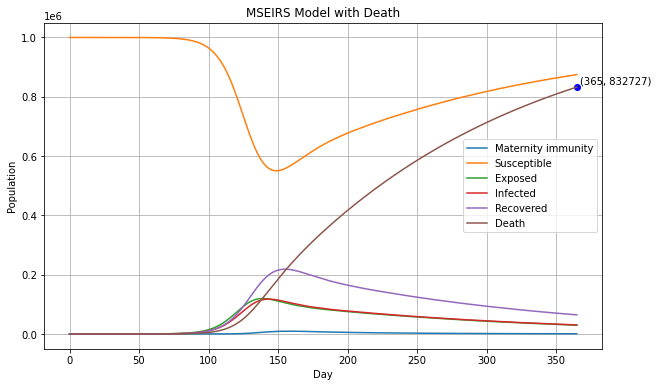

In [11]:
# Plotting the MSEIRS + Death model 
plt.figure(figsize=(10, 6))
plt.plot(times, M, label='Maternity immunity')
plt.plot(times, S, label='Susceptible')
plt.plot(times, E, label='Exposed')
plt.plot(times, I, label='Infected')
plt.plot(times, R, label='Recovered')
plt.plot(times, D, label='Death')
plt.xlabel('Day')
plt.ylabel('Population')
plt.title('MSEIRS Model with Death')
plt.legend()

# Adding horizontal and vertical lines to the maximum death point
point_x_d = peak_time_death  
point_y_d = peak_death

# # Horizontal line
# plt.axhline(y=point_y_d, color='y', linestyle='--')  
# # Vertical line
# plt.axvline(x=point_x_d, color='y', linestyle='--')  

# Marking the point
plt.scatter(point_x_d, point_y_d, color='b', marker='o')

# Adding text annotation for the point coordinates
plt.text(point_x_d + 2, point_y_d + 10000, f'({point_x_d}, {round(point_y_d)})', color='black')

plt.grid(True)
plt.show()